In [ ]:
import sqlite3
import pandas as pd 
import matplotlib.pyplot as plt


In [14]:
conn = sqlite3.connect("C:\\Users\\SagaF\\Downloads\\FPA_FOD_20210617.sqlite")


In [15]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Available tables:")
print(tables)

Available tables:
                         name
0  NWCG_UnitIDActive_20200123
1                       Fires


In [16]:

# Run a SQL query inside Python
query = "SELECT * FROM Fires"
fpa = pd.read_sql_query(query, conn)

# Now fpa is a pandas DataFrame in Python
print(fpa.shape)
print(fpa.head())

(2166753, 37)
   FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM NWCG_REPORTING_AGENCY  \
0       1  FS-1418826                FED   FS-FIRESTAT                    FS   
1       2  FS-1418827                FED   FS-FIRESTAT                    FS   
2       3  FS-1418835                FED   FS-FIRESTAT                    FS   
3       4  FS-1418845                FED   FS-FIRESTAT                    FS   
4       5  FS-1418847                FED   FS-FIRESTAT                    FS   

  NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                USCAPNF    Plumas National Forest                   511   
1                USCAENF  Eldorado National Forest                   503   
2                USCAENF  Eldorado National Forest                   503   
3                USCAENF  Eldorado National Forest                   503   
4                USCAENF  Eldorado National Forest                   503   

  SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_I

In [19]:
query = """
SELECT 
    FIRE_YEAR, 
    DISCOVERY_DATE, 
    NWCG_GENERAL_CAUSE, 
    FIRE_SIZE, 
    FIRE_SIZE_CLASS,
    LATITUDE, 
    LONGITUDE, 
    STATE, 
    COUNTY
FROM Fires
"""
fpa = pd.read_sql_query(query, conn)

print(fpa.shape)
print(fpa.head())


(2166753, 9)
   FIRE_YEAR  DISCOVERY_DATE                          NWCG_GENERAL_CAUSE  \
0       2005   2/2/2005 0:00  Power generation/transmission/distribution   
1       2004  5/12/2004 0:00                                     Natural   
2       2004  5/31/2004 0:00                     Debris and open burning   
3       2004  6/28/2004 0:00                                     Natural   
4       2004  6/28/2004 0:00                                     Natural   

   FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE   LONGITUDE STATE COUNTY  
0       0.10               A  40.036944 -121.005833    CA     63  
1       0.25               A  38.933056 -120.404444    CA     61  
2       0.10               A  38.984167 -120.735556    CA     17  
3       0.10               A  38.559167 -119.913333    CA      3  
4       0.10               A  38.559167 -119.933056    CA      3  


In [28]:

missing = fpa.isnull().sum()

missing = missing[missing > 0]

print("Missing values per column:")
print(missing)


Missing values per column:
COUNTY    657235
dtype: int64


In [30]:

duplicates = fpa.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 7314


In [32]:
# Drop duplicate rows
fpa = fpa.drop_duplicates()

print(f"New shape after dropping duplicates: {fpa.shape}")


New shape after dropping duplicates: (2159439, 9)


In [33]:

print("\nData Info:")
print(fpa.info())


print("\nNumeric Summary:")
print(fpa.describe())



Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 2159439 entries, 0 to 2166752
Data columns (total 9 columns):
 #   Column              Dtype  
---  ------              -----  
 0   FIRE_YEAR           int64  
 1   DISCOVERY_DATE      object 
 2   NWCG_GENERAL_CAUSE  object 
 3   FIRE_SIZE           float64
 4   FIRE_SIZE_CLASS     object 
 5   LATITUDE            float64
 6   LONGITUDE           float64
 7   STATE               object 
 8   COUNTY              object 
dtypes: float64(3), int64(1), object(5)
memory usage: 164.8+ MB
None

Numeric Summary:
          FIRE_YEAR     FIRE_SIZE      LATITUDE     LONGITUDE
count  2.159439e+06  2.159439e+06  2.159439e+06  2.159439e+06
mean   2.005330e+03  7.624453e+01  3.688666e+01 -9.617824e+01
std    7.534890e+00  2.540329e+03  6.016096e+00  1.663616e+01
min    1.992000e+03  1.000000e-05  1.793972e+01 -1.788026e+02
25%    1.999000e+03  1.000000e-01  3.296233e+01 -1.108093e+02
50%    2.006000e+03  1.000000e+00  3.563330e+01 -9.308611e+

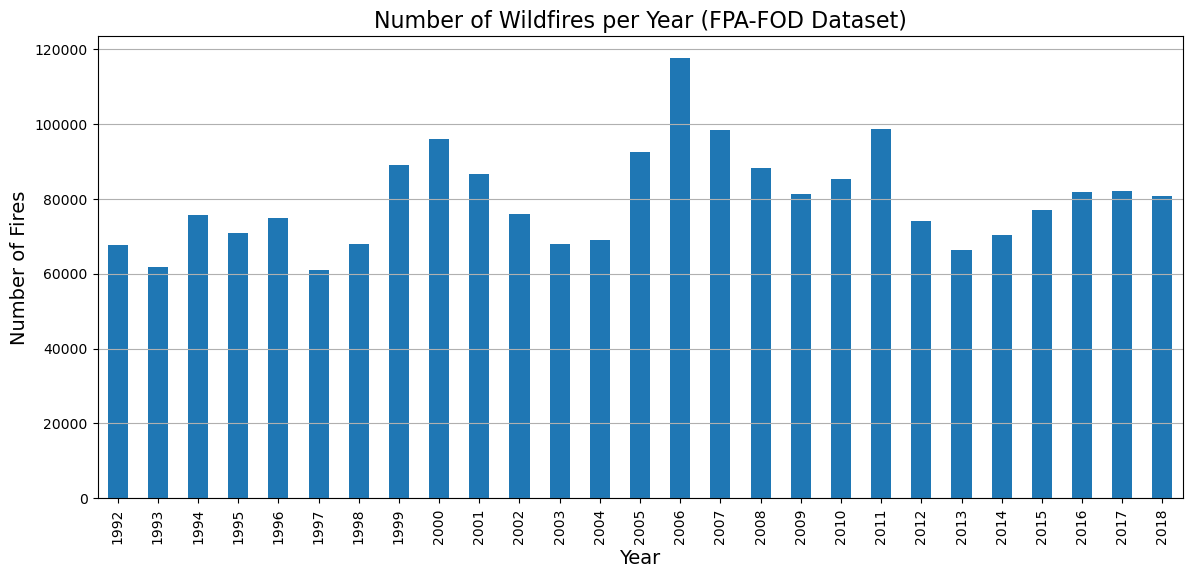

In [34]:
import matplotlib.pyplot as plt


fires_per_year = fpa['FIRE_YEAR'].value_counts().sort_index()


plt.figure(figsize=(14,6))
fires_per_year.plot(kind='bar')

plt.title('Number of Wildfires per Year (FPA-FOD Dataset)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.grid(axis='y')
plt.show()


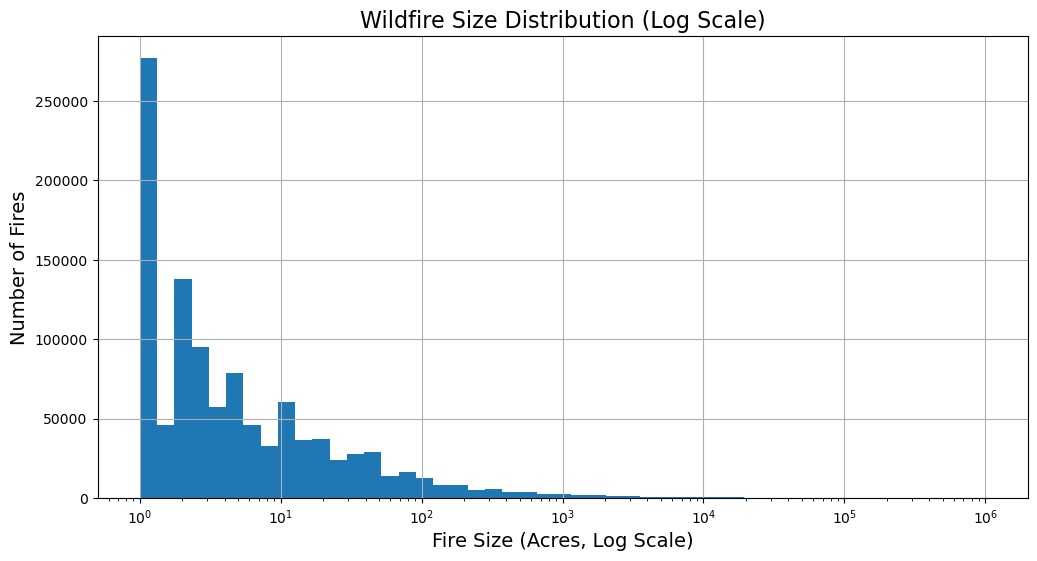

In [36]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(12,6))
plt.hist(fpa['FIRE_SIZE'], bins=np.logspace(0, 6, 50))  # Log bins (1 to 1 million acres)
plt.xscale('log')

plt.title('Wildfire Size Distribution (Log Scale)', fontsize=16)
plt.xlabel('Fire Size (Acres, Log Scale)', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.grid(True)
plt.show()


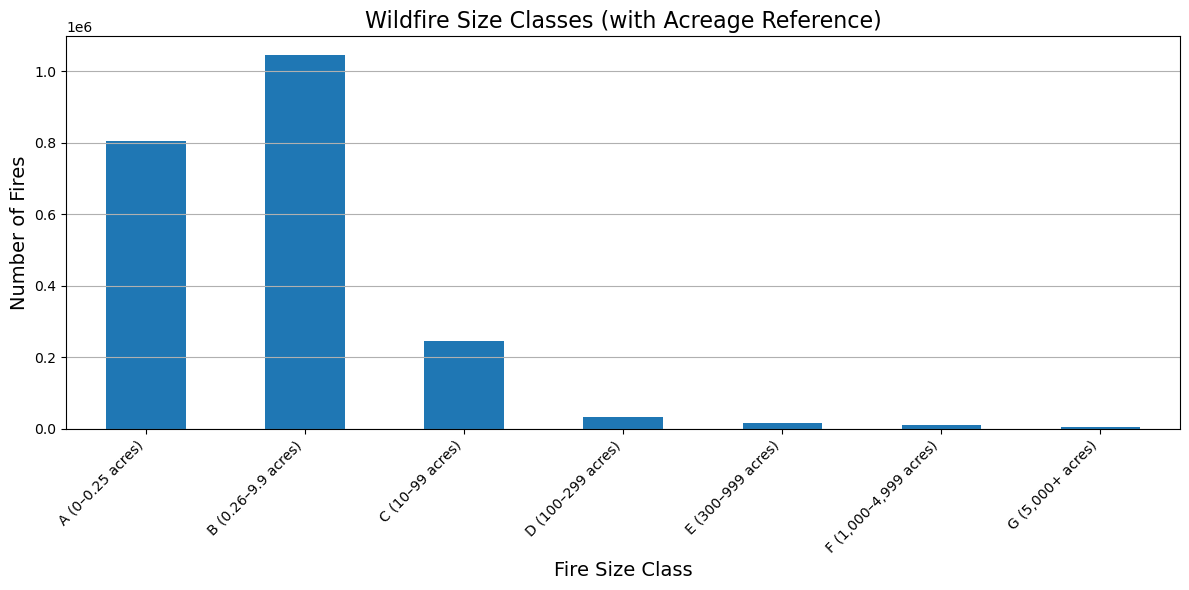

In [38]:

size_classes = fpa['FIRE_SIZE_CLASS'].value_counts().sort_index()

class_labels = {
    'A': 'A (0–0.25 acres)',
    'B': 'B (0.26–9.9 acres)',
    'C': 'C (10–99 acres)',
    'D': 'D (100–299 acres)',
    'E': 'E (300–999 acres)',
    'F': 'F (1,000–4,999 acres)',
    'G': 'G (5,000+ acres)'
}

size_classes.index = [class_labels.get(c, c) for c in size_classes.index]


plt.figure(figsize=(12,6))
size_classes.plot(kind='bar')

plt.title('Wildfire Size Classes (with Acreage Reference)', fontsize=16)
plt.xlabel('Fire Size Class', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


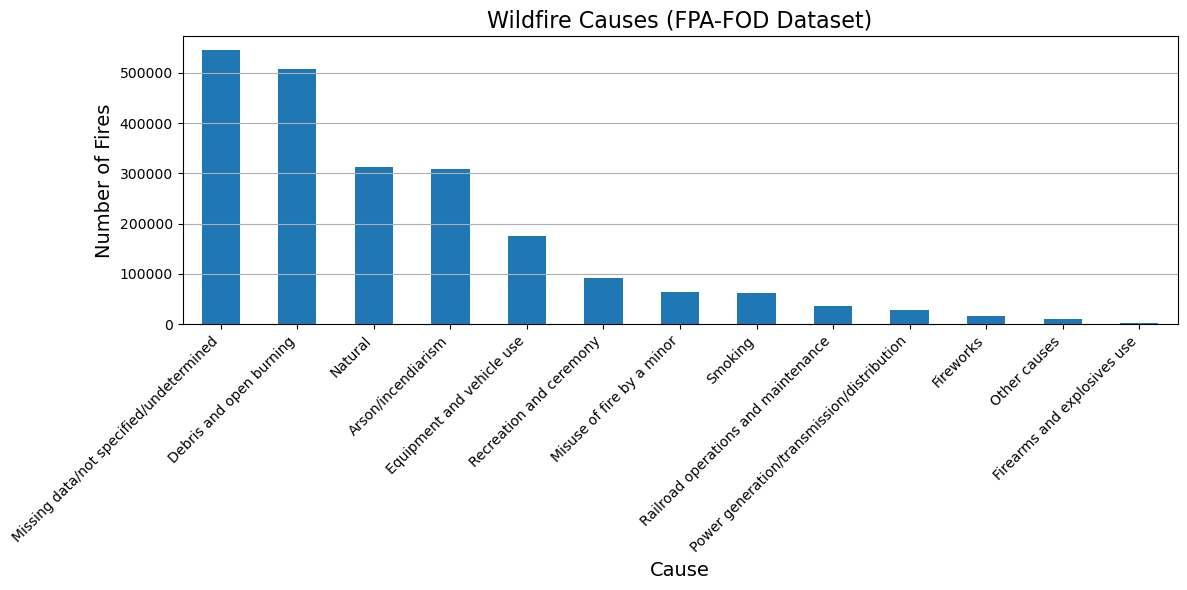

In [40]:

cause_counts = fpa['NWCG_GENERAL_CAUSE'].value_counts()


plt.figure(figsize=(12,6))
cause_counts.plot(kind='bar')

plt.title('Wildfire Causes (FPA-FOD Dataset)', fontsize=16)
plt.xlabel('Cause', fontsize=14)
plt.ylabel('Number of Fires', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [58]:
#pip install folium 
import folium

# Create a base map
fire_map = folium.Map(location=[37.0, -95.7], zoom_start=5, tiles='OpenStreetMap')

# Sample 1000 fires for performance (no clusters needed)
sample_fires = fpa.sample(1000, random_state=42)

# Function to pick color based on fire size
def get_fire_color(size):
    if size >= 1000:
        return 'red'
    elif size >= 100:
        return 'orange'
    else:
        return 'yellow'

# Add CircleMarkers with popups (NO clustering this time)
for idx, row in sample_fires.iterrows():
    folium.CircleMarker(
    location=[row['LATITUDE'], row['LONGITUDE']],
    radius=5,
    color=get_fire_color(row['FIRE_SIZE']),
    fill=True,
    fill_opacity=0.7,
    popup=f"🔥 Size: {row['FIRE_SIZE']} acres\n📅 Year: {row['FIRE_YEAR']}\n⚡ Cause: {row['NWCG_GENERAL_CAUSE']}"
).add_to(fire_map)

# Save the map
fire_map.save("../outputs/wildfire_map.html")


In [ ]:

from folium.plugins import HeatMap

heat_map = folium.Map(location=[37.0, -95.7], zoom_start=5, tiles='Stamen Toner')
sample_fires = fpa.sample(10000, random_state=42)
heat_data = [[row['LATITUDE'], row['LONGITUDE']] for idx, row in sample_fires.iterrows()]
HeatMap(heat_data, radius=8, blur=15, max_zoom=10).add_to(heat_map)
heat_map.save("../outputs/wildfire_heatmap.html")


In [62]:
from folium.plugins import HeatMapWithTime


animated_map = folium.Map(location=[37.0, -95.7], zoom_start=5, tiles='Stamen Toner')


valid_fires = fpa.dropna(subset=['LATITUDE', 'LONGITUDE'])
fires = valid_fires[['FIRE_YEAR', 'LATITUDE', 'LONGITUDE']]
years = sorted(fires['FIRE_YEAR'].unique())
heatmap_data = []

for year in years:
    year_data = fires[fires['FIRE_YEAR'] == year]
    heatmap_data.append(
        year_data[['LATITUDE', 'LONGITUDE']].values.tolist()
    )

HeatMapWithTime(
    heatmap_data,
    index=years,
    auto_play=True,
    max_opacity=0.8,
    radius=8,
    gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 0.8: 'red'}
).add_to(animated_map)


legend_html = '''
<div style="
    position: fixed;
    bottom: 50px;
    left: 50px;
    width: 180px;
    height: 120px;
    background-color: white;
    border:2px solid grey;
    z-index:9999;
    font-size:14px;
    padding: 10px;
">
<b> Fire Intensity Legend</b><br>
<span style="background:blue;width:20px;height:10px;display:inline-block;"></span> Low<br>
<span style="background:lime;width:20px;height:10px;display:inline-block;"></span> Medium-Low<br>
<span style="background:orange;width:20px;height:10px;display:inline-block;"></span> Medium-High<br>
<span style="background:red;width:20px;height:10px;display:inline-block;"></span> High
</div>
'''
animated_map.get_root().html.add_child(folium.Element(legend_html))

animated_map.save("../outputs/wildfire_heatmap_time.html")


In [ ]:
#ML PREP HERE ON DOWNWARD

In [63]:
# Binary target column: 1 if fire >= 1000 acres, else 0
fpa['Large_Fire'] = (fpa['FIRE_SIZE'] >= 1000).astype(int)

print(fpa['Large_Fire'].value_counts())


Large_Fire
0    2145887
1      13552
Name: count, dtype: int64


In [64]:
# Select features + target
ml_data = fpa[['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'LATITUDE', 'LONGITUDE', 'STATE', 'Large_Fire']].dropna()


In [65]:
# One-hot encoding my categorical variables
ml_data_encoded = pd.get_dummies(ml_data, columns=['NWCG_GENERAL_CAUSE', 'STATE'])

print(ml_data_encoded.head())


   FIRE_YEAR   LATITUDE   LONGITUDE  Large_Fire  \
0       2005  40.036944 -121.005833           0   
1       2004  38.933056 -120.404444           0   
2       2004  38.984167 -120.735556           0   
3       2004  38.559167 -119.913333           0   
4       2004  38.559167 -119.933056           0   

   NWCG_GENERAL_CAUSE_Arson/incendiarism  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   NWCG_GENERAL_CAUSE_Debris and open burning  \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   NWCG_GENERAL_CAUSE_Equipment and vehicle use  \
0                                         False   
1                              

In [ ]:
from sklearn.model_selection import train_test_split

X = ml_data_encoded.drop('Large_Fire', axis=1)
y = ml_data_encoded['Large_Fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)


(1727551, 68) (431888, 68)


In [67]:
from sklearn.linear_model import LogisticRegression

# logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


print("Accuracy:", accuracy_score(y_test, y_pred))


print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9936696550957655
Confusion Matrix:
[[429154      0]
 [  2734      0]]
Classification Report:


c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    429154
           1       0.00      0.00      0.00      2734

    accuracy                           0.99    431888
   macro avg       0.50      0.50      0.50    431888
weighted avg       0.99      0.99      0.99    431888



c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:

ml_data = fpa[['FIRE_YEAR', 'NWCG_GENERAL_CAUSE', 'LATITUDE', 'LONGITUDE', 'STATE', 'Large_Fire']].dropna()
print(ml_data.head())
print(ml_data.shape)


   FIRE_YEAR                          NWCG_GENERAL_CAUSE   LATITUDE  \
0       2005  Power generation/transmission/distribution  40.036944   
1       2004                                     Natural  38.933056   
2       2004                     Debris and open burning  38.984167   
3       2004                                     Natural  38.559167   
4       2004                                     Natural  38.559167   

    LONGITUDE STATE  Large_Fire  
0 -121.005833    CA           0  
1 -120.404444    CA           0  
2 -120.735556    CA           0  
3 -119.913333    CA           0  
4 -119.933056    CA           0  
(2159439, 6)


In [70]:
# One-hot encoded 'NWCG_GENERAL_CAUSE' and 'STATE'
ml_data_encoded = pd.get_dummies(ml_data, columns=['NWCG_GENERAL_CAUSE', 'STATE'])
print(ml_data_encoded.head())
print(ml_data_encoded.shape)


   FIRE_YEAR   LATITUDE   LONGITUDE  Large_Fire  \
0       2005  40.036944 -121.005833           0   
1       2004  38.933056 -120.404444           0   
2       2004  38.984167 -120.735556           0   
3       2004  38.559167 -119.913333           0   
4       2004  38.559167 -119.933056           0   

   NWCG_GENERAL_CAUSE_Arson/incendiarism  \
0                                  False   
1                                  False   
2                                  False   
3                                  False   
4                                  False   

   NWCG_GENERAL_CAUSE_Debris and open burning  \
0                                       False   
1                                       False   
2                                        True   
3                                       False   
4                                       False   

   NWCG_GENERAL_CAUSE_Equipment and vehicle use  \
0                                         False   
1                              

In [ ]:



X = ml_data_encoded.drop('Large_Fire', axis=1)
y = ml_data_encoded['Large_Fire']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1727551, 68)
Test shape: (431888, 68)


In [ ]:


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [74]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9937

Confusion Matrix:
[[429154      0]
 [  2734      0]]

Classification Report:


c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00    429154
           1       0.00      0.00      0.00      2734

    accuracy                           0.99    431888
   macro avg       0.50      0.50      0.50    431888
weighted avg       0.99      0.99      0.99    431888



c:\Users\SagaF\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#okay so my model is being dumb, predicting small fires and getting 99% accuracy, we have an imbalance
#i have 400k+ small fires in the data and 2k+ large fires, so my model is biased

In [75]:
#making weights for the LR 

# Retraining Logistic Regression with class weights
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

y_pred_balanced = model_balanced.predict(X_test)
print("Balanced Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("\nBalanced Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))
print("\nBalanced Classification Report:")
print(classification_report(y_test, y_pred_balanced))


Balanced Accuracy: 0.7355425480680177

Balanced Confusion Matrix:
[[315540 113614]
 [   602   2132]]

Balanced Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.74      0.85    429154
           1       0.02      0.78      0.04      2734

    accuracy                           0.74    431888
   macro avg       0.51      0.76      0.44    431888
weighted avg       0.99      0.74      0.84    431888



In [ ]:
#still an overprediction issue, (low precision)

In [76]:
from sklearn.ensemble import RandomForestClassifier

#rndm frst model 
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9933779127922054

Random Forest Confusion Matrix:
[[428887    267]
 [  2593    141]]

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    429154
           1       0.35      0.05      0.09      2734

    accuracy                           0.99    431888
   macro avg       0.67      0.53      0.54    431888
weighted avg       0.99      0.99      0.99    431888



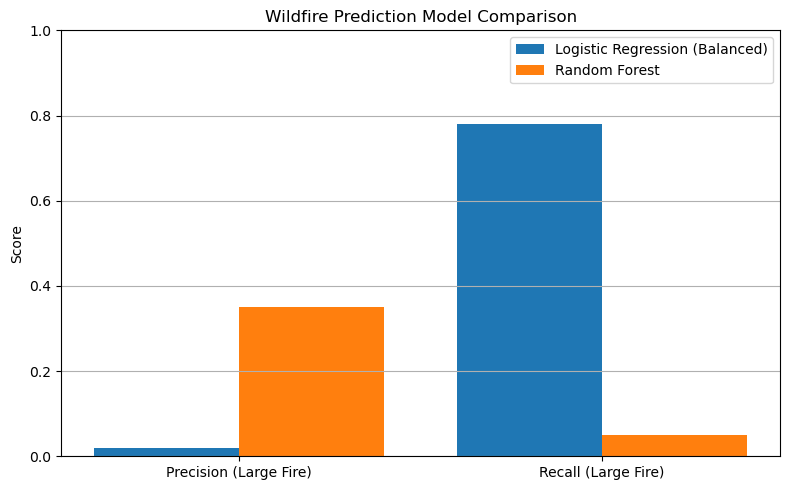

In [77]:


#comparison data
metrics = ['Precision (Large Fire)', 'Recall (Large Fire)']
logistic_scores = [0.02, 0.78]  # From balanced logistic regression
rf_scores = [0.35, 0.05]        # From random forest

x = range(len(metrics))

plt.figure(figsize=(8,5))
plt.bar(x, logistic_scores, width=0.4, label='Logistic Regression (Balanced)', align='center')
plt.bar([i + 0.4 for i in x], rf_scores, width=0.4, label='Random Forest', align='center')
plt.xticks([i + 0.2 for i in x], metrics)
plt.ylim(0, 1)
plt.title('Wildfire Prediction Model Comparison')
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()
